5. [Preparation of Modelling](#39)
    * 5.1 [Dropping Columns with Low Correlation](#40)
    * 5.2 [Struggling Outliers](#41)
        * 5.2.1 [Visualizing outliers](#42)
            * 5.2.1.1 [Analysis Outputs(12)](#43)
        * 5.2.2 [Dealing with outliers](#44)
            * 5.2.2.1 [Trtbps Variable](#45)
            * 5.2.2.2 [Thalach Variable](#46)
            * 5.2.2.3 [Oldpeak Variable](#47)
        * 5.3 [Determining Distributions of Numeric Variables](#48)
        * 5.4 [Transformation Operations on Unsymmetrical Data](#49)
        * 5.5 [Applying One Hot Encoding Method to Categorical Variables](#50)
        * 5.6 [Feature Scaling with the RobustScaler Method for Machine Learning Algorithms](#51)
        * 5.7 [Separating Data into Test and Training Set](#52)
6. [Modelling](#53)
    * 6.1 [Logistic Regression Algorithm](#54)
        * 6.1.1 [Cross Validation](#55)
        * 6.1.2 [Roc Curve and Area Under Curve(AUC)](#56)
        * 6.1.3 [Hyperparameter Optimization(With GridSearchCV)](#57)
    * 6.2 [Decision Tree Algorithm](#58)
    * 6.3 [Support Vector Machine Algorithm](#59)
    * 6.4 [Random Forest Algorithm](#60)
        * 6.4.1 [Hyperparameter Optimization(With GridSearchCV)](#61)
7. [Project Conclusion](#62)

## 5. Preparation for Modelling<a id = 39></a>

[Go to Project Content](#x)

### 5.1 Dropping Columns with low Correlation<a id = 40></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


df_new2 = pd.read_csv("../dataset/Correlation_Check_data.csv")
df_new2.head()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1


In [40]:
df = pd.read_csv("../dataset/Heart_clean_data.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
numeric_var = 'age trtbps chol thalach oldpeak'.split()
categoric_var = 'sex cp fbs rest_ecg exang slope ca thal target'.split()
pd.DataFrame(data = [numeric_var, categoric_var],index = ["numeric_variables","categorical_variables"])

,0,1,2,3,4,5,6,7,8
numeric_variables,age,trtbps,chol,thalach,oldpeak,None,None,None,None
categorical_variables,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target


In [42]:
df.drop(['chol','fbs','rest_ecg'],axis = 1,inplace = True)
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


### 5.2 Struggling Outliers<a id = 41></a>

[Go to Project Content](#x)

#### 5.2.1 Visualizing Outliers<a id = 42></a>

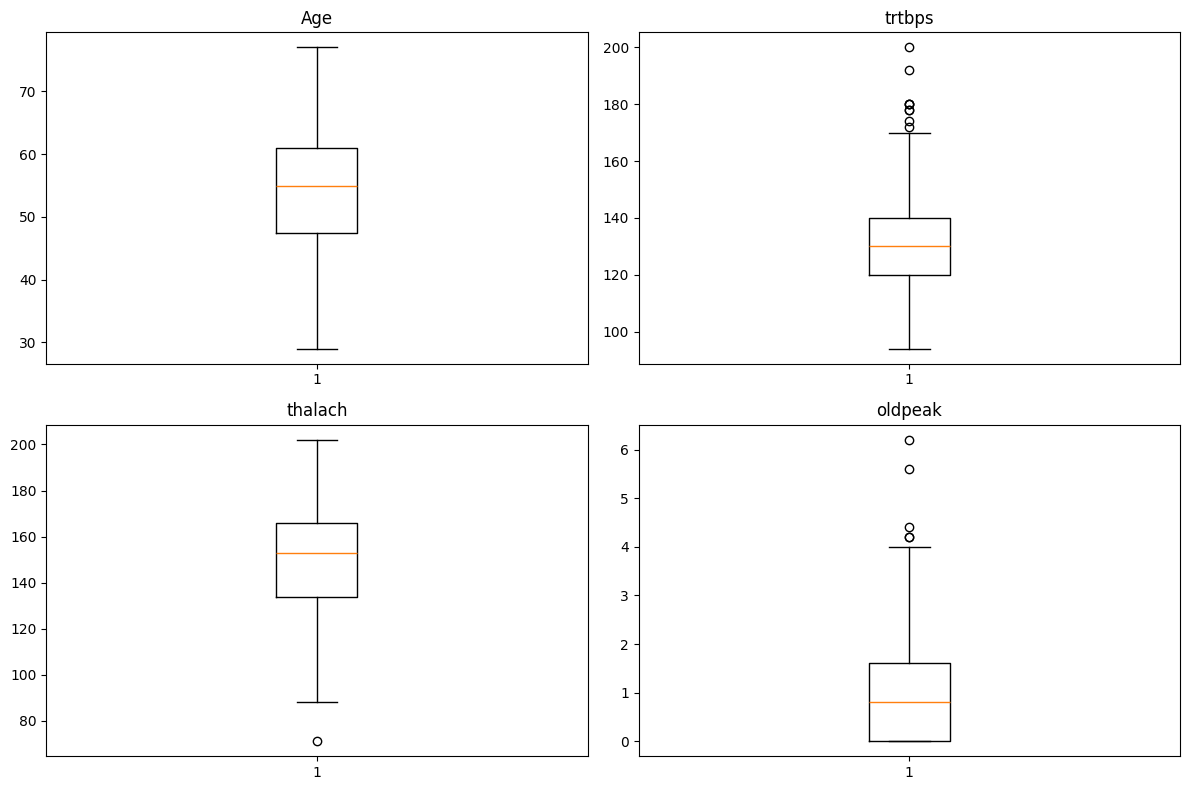

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=100)

# Unpack axes into 2x2 grid
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.boxplot(df["age"])
ax1.set_title("Age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.tight_layout()
plt.show()

#### 5.2.2 Dealing with Outliers<a id = 43></a>

##### 5.2.2.1 Trtbps Variable<a id = 44></a>

In [44]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [45]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1,4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps>threshold)[0])))
    print("-----------------------")

Threshold Value: 1
Number of Outliers: 51
-----------------------
Threshold Value: 2
Number of Outliers: 13
-----------------------
Threshold Value: 3
Number of Outliers: 2
-----------------------


In [46]:
df[z_scores_trtbps>2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [47]:
df[z_scores_trtbps>2][["trtbps"]].min()

trtbps    170
dtype: int64

In [48]:
df[df['trtbps']<170].trtbps.max()

np.int64(165)

In [49]:
winsorize_percentile_trtbps = (stats.percentileofscore(df['trtbps'],165))/100
print(winsorize_percentile_trtbps)

0.957095709570957


In [50]:
1 -winsorize_percentile_trtbps

np.float64(0.04290429042904298)

In [51]:
trtbps_winsorize = winsorize(df.trtbps,(0,(1 -winsorize_percentile_trtbps)))

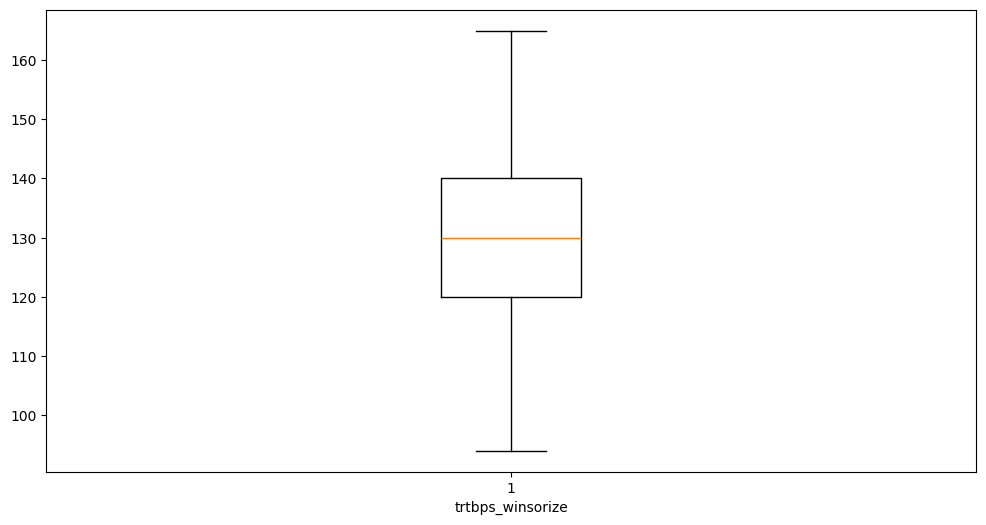

In [52]:
plt.figure(figsize=(12,6))   
plt.boxplot(trtbps_winsorize)
plt.xlabel('trtbps_winsorize', color="black")
plt.show()

In [53]:
df['trtbps_winsorize'] = trtbps_winsorize
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


##### 5.2.2.2 Thalach Variable<a id = 45></a>

In [54]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3-q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [55]:
thalach_out = iqr(df,"thalach")
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [56]:
df.drop([272],axis = 0,inplace = True)

In [57]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

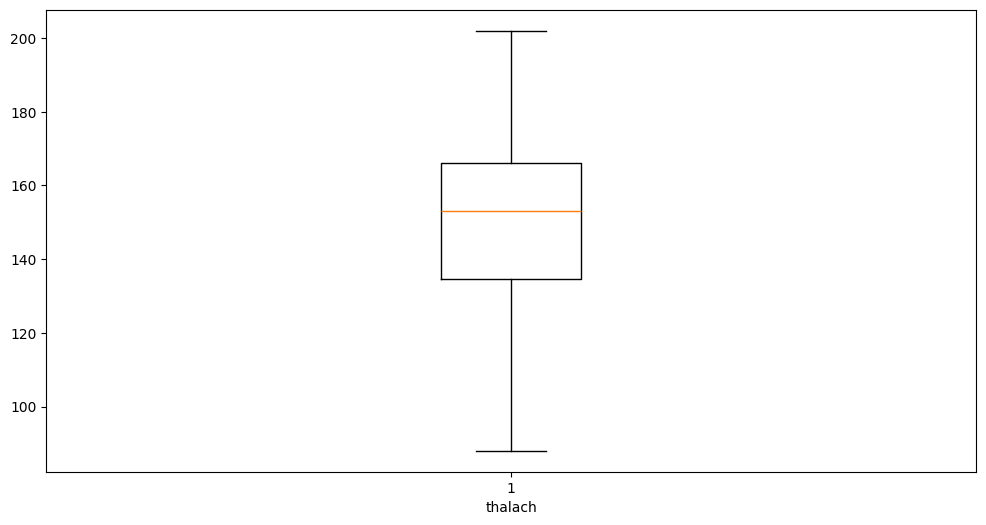

In [58]:
plt.figure(figsize=(12,6)) 
plt.boxplot(df["thalach"])
plt.xlabel("thalach", color="black")
plt.show()

##### 5.2.2.3 Oldpeak Variable<a id = 46></a>

In [59]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

iqr(df,'oldpeak')

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [60]:
df[df['oldpeak']<4.2].oldpeak.max()

winsorize_percentile_oldpeak = (stats.percentileofscore(df['oldpeak'],4))/100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [61]:
oldpeak_winsorize = winsorize(df.oldpeak,(0,(1-winsorize_percentile_oldpeak)))

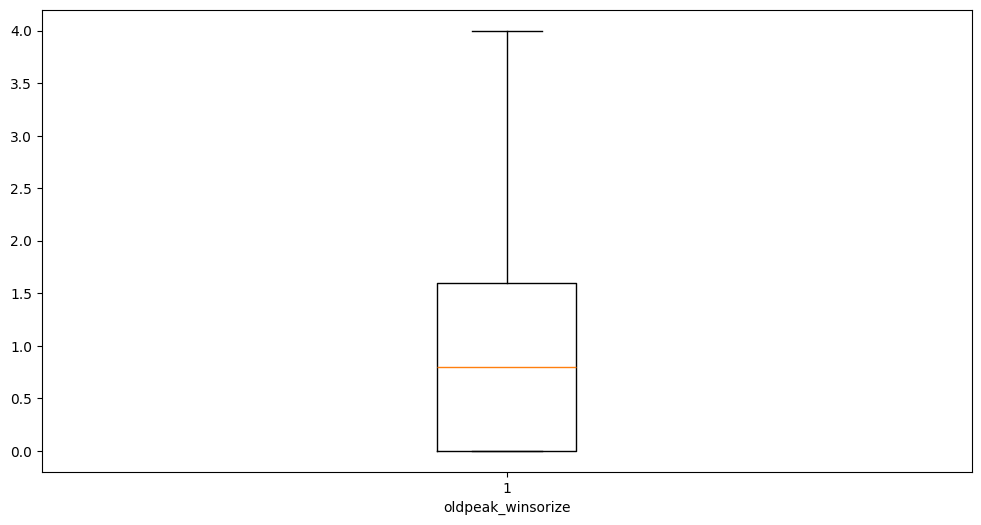

In [62]:
plt.figure(figsize=(12,6)) 
plt.boxplot(oldpeak_winsorize)
plt.xlabel('oldpeak_winsorize',color = "black")
plt.show()

In [63]:
df['oldpeak_winsorize'] = oldpeak_winsorize
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [64]:
df.drop(['trtbps','oldpeak'],axis = 1,inplace = True)
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


### 5.3 Deetermining Distributions of Numeric Variables<a id = 47></a>

[Go to Project Content](#x)

In [65]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


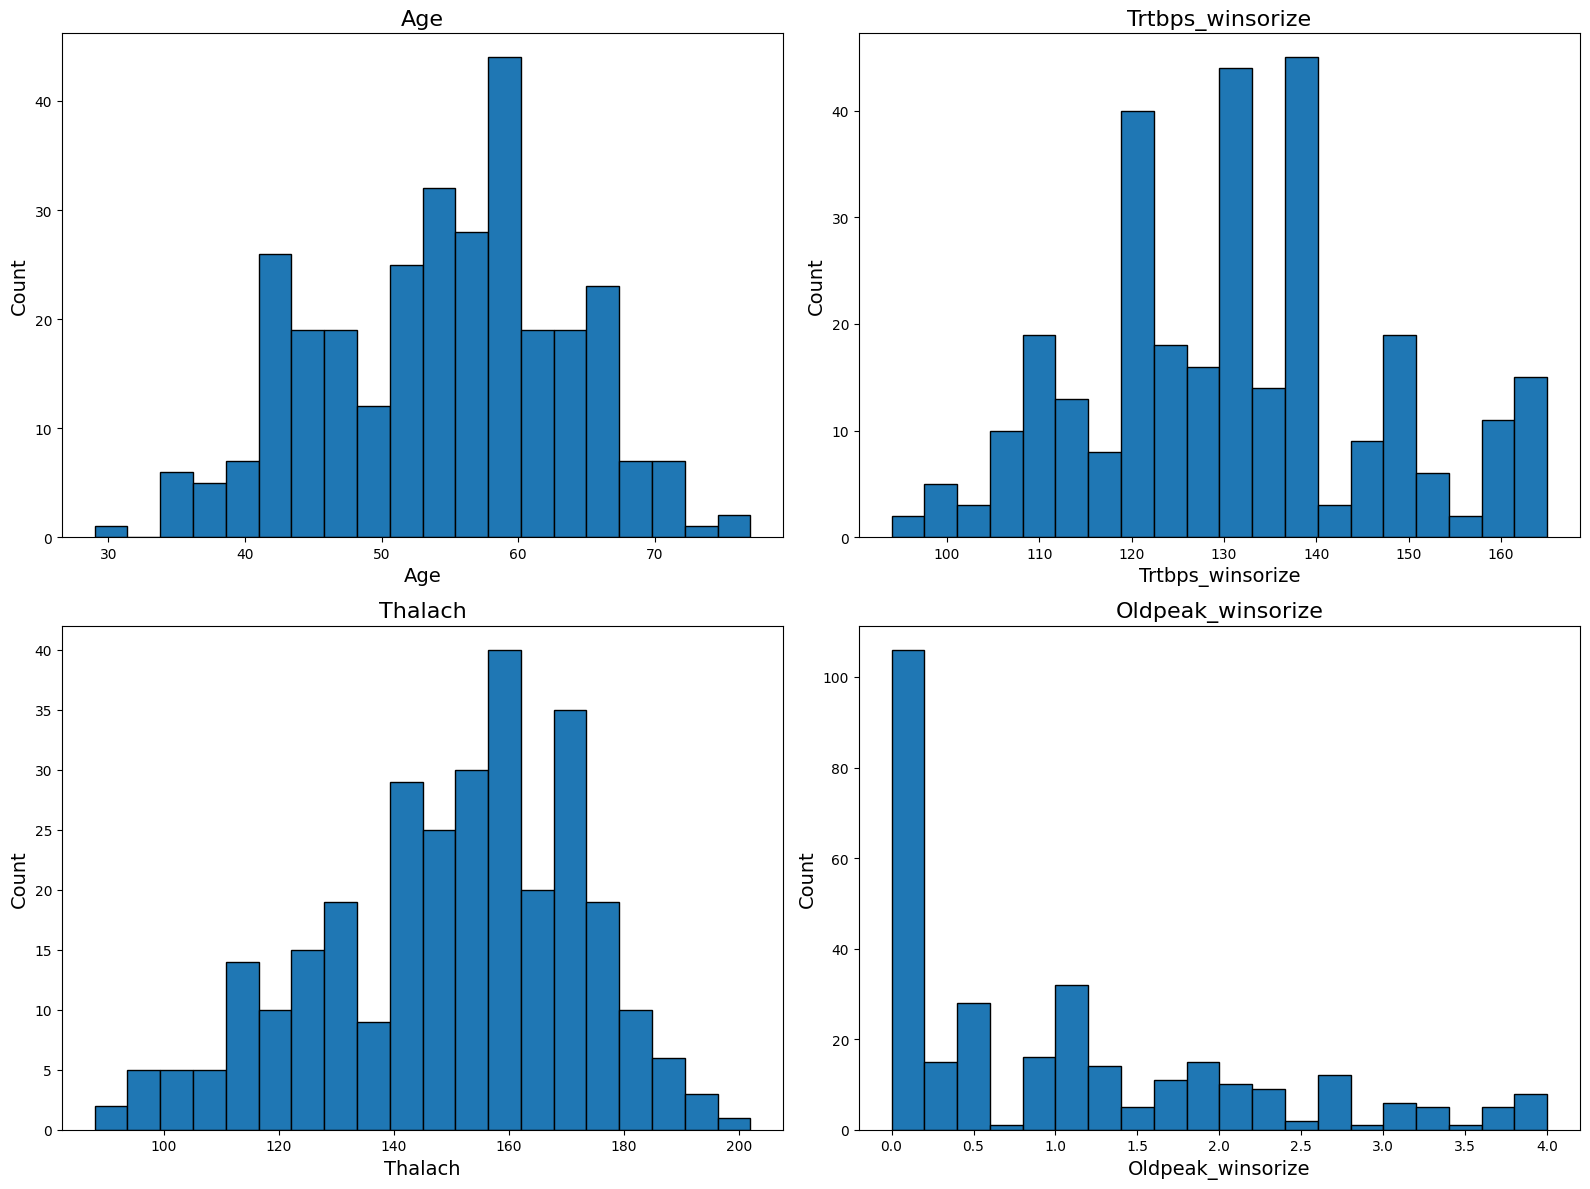

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=100)

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.hist(df["age"], bins=20, edgecolor="black")
ax1.set_title("Age", fontsize=16)
ax1.set_xlabel("Age", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)

ax2.hist(df["trtbps_winsorize"], bins=20, edgecolor="black")
ax2.set_title("Trtbps_winsorize", fontsize=16)
ax2.set_xlabel("Trtbps_winsorize", fontsize=14)
ax2.set_ylabel("Count", fontsize=14)

ax3.hist(df["thalach"], bins=20, edgecolor="black")
ax3.set_title("Thalach", fontsize=16)
ax3.set_xlabel("Thalach", fontsize=14)
ax3.set_ylabel("Count", fontsize=14)

ax4.hist(df["oldpeak_winsorize"], bins=20, edgecolor="black")
ax4.set_title("Oldpeak_winsorize", fontsize=16)
ax4.set_xlabel("Oldpeak_winsorize", fontsize=14)
ax4.set_ylabel("Count", fontsize=14)

plt.tight_layout()
plt.show()

In [67]:
df['age trtbps_winsorize thalach oldpeak_winsorize'.split()].agg(['skew']).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


## 5.4 Transformation Operations on Unsymmetrical Data<a id = 48></a>

[Go to Project Content](#x)

In [68]:
df["oldpeak_winsorize_log"] = np.log(df['oldpeak_winsorize'])
df['oldpeak_winsorize_sqrt']= np.sqrt(df["oldpeak_winsorize"])

df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [69]:
df["oldpeak_winsorize oldpeak_winsorize_log oldpeak_winsorize_sqrt".split()].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [70]:
df.drop(['oldpeak_winsorize','oldpeak_winsorize_log'],axis = 1,inplace = True)
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


### 5.5 Applying One Hot Encoding Method to Categorical Variables<a id = 49></a>

[Go to Project Content](#x)

In [71]:
df_copy = df.copy()
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [72]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [73]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [74]:
df_copy = pd.get_dummies(df_copy,columns = categoric_var[:-1],drop_first = True)
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,True,False,False,True,False,False,False,False,False,False,False,False,False
1,37,187,1,130,1.870829,True,False,True,False,False,False,False,False,False,False,False,True,False
2,41,172,1,130,1.183216,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,178,1,120,0.894427,True,True,False,False,False,False,True,False,False,False,False,True,False
4,57,163,1,120,0.774597,False,False,False,False,True,False,True,False,False,False,False,True,False


### 5.6 Feature Scaling with the RobustScaler Method for Machine Learning Algorithms<a id = 50></a>

[Go to Project Content](#x)

In [75]:
new_numeric_var ='age thalach trtbps_winsorize oldpeak_winsorize_sqrt'.split()

In [76]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.309091,1.079365,1,0.00,0.771913,True,False,True,False,False,False,False,False,False,False,False,True,False
2,-1.018182,0.603175,1,0.00,0.228308,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.072727,0.793651,1,-0.50,0.000000,True,True,False,False,False,False,True,False,False,False,False,True,False
4,0.145455,0.317460,1,-0.50,-0.094734,False,False,False,False,True,False,True,False,False,False,False,True,False


### 5.7 Separating Data into test and training set<a id = 51></a>

[Go to Project Content](#x)

In [77]:
from sklearn.model_selection import train_test_split

x = df_copy.drop(["target"],axis = 1)
y = df_copy["target"]

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=3)

print(f"x_train: {x_train.shape[0]}")
print(f"x_test: {x_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

x_train: 271
x_test: 31
y_train: 271
y_test: 31


### 6. Modelling<a id = 52></a>

#### 6.1 Logistic Regression Algorithm<a id=53></a>

[Go to Project Content](#x)

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [80]:
log_reg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [82]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


### 6.1.1 Cross Validation <a id = 54></a>

In [83]:
from sklearn.model_selection import cross_val_score

![Alt text](https://towardsdatascience.com/wp-content/uploads/2023/12/1N45hocCMP0u4nXLe0WuSvw.png)

In [84]:
scores = cross_val_score(log_reg,x_test,y_test,cv = 10)
print("Cross Validation Accuracy Scores",scores.mean())

Cross Validation Accuracy Scores 0.8666666666666666


### 6.1.2 ROC Curve and Area Under Curve (AUC)<a id = 55></a>

In [85]:
from sklearn.metrics import RocCurveDisplay

![Alt text](https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/06/roc-curve.jpg?fit=1200%2C675&ssl=1)

![Alt text](https://developers.google.com/static/machine-learning/crash-course/images/auc_0-77.png)

![Alt text](https://www.researchgate.net/publication/269510338/figure/tbl1/AS:613931454304290@1523384073561/AUC-value-Its-Meaning-and-Symbols.png)

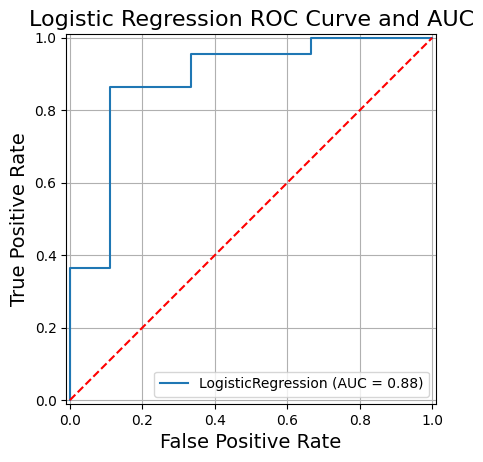

In [122]:
RocCurveDisplay.from_estimator(log_reg, x_test, y_test)
plt.plot([0, 1], [0, 1], 'r--')  # diagonal line
plt.title("Logistic Regression ROC Curve and AUC", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid(True)
plt.show()

### 6.1.3 Hyperparameter Optimization with (GridSearchCV)<a id = 56></a>

[Go to Project Content](#x)

In [87]:
from sklearn.model_selection import GridSearchCV

log_reg_new = LogisticRegression()
log_reg_new

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:
parameters = {'penalty':["l1",'l2'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [89]:
log_reg_grid = GridSearchCV(log_reg_new,param_grid=parameters)

In [90]:
log_reg_grid.fit(x_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [91]:
print("Best Parameters: ",log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [92]:
log_reg_new2 = LogisticRegression(penalty = 'l1',solver = 'saga')
log_reg_new2

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [93]:
log_reg_new2.fit(x_train,y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [94]:
y_pred = log_reg_new2.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [95]:
print("Accuracy Score after hypeerparameter tuning is: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score after hypeerparameter tuning is: 0.8709677419354839


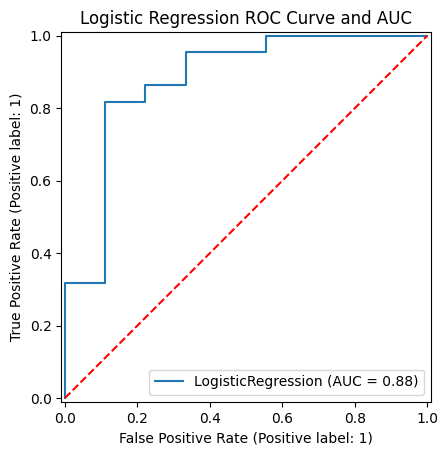

In [123]:
RocCurveDisplay.from_estimator(log_reg_new2, x_test, y_test)
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0, 1], [0, 1], 'r--')

### 6.2 Decision Tree Algorithm<a id = 57></a>

In [97]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [98]:
y_pred = dec_tree.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1])

In [99]:
print("The test accuracy score of Decision Tree is: ",accuracy_score(y_test,y_pred))

The test accuracy score of Decision Tree is:  0.8387096774193549


In [100]:
scores = cross_val_score(dec_tree,x_test,y_test,cv = 10)
print("Decision Tree Cross-Validation Accuracy Scores",scores.mean())

Decision Tree Cross-Validation Accuracy Scores 0.8333333333333333


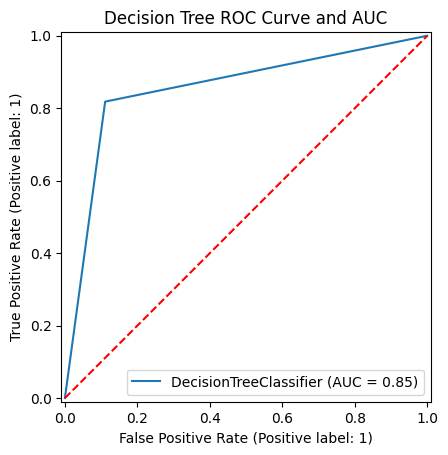

In [124]:
RocCurveDisplay.from_estimator(dec_tree, x_test, y_test)
plt.title("Decision Tree ROC Curve and AUC")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### 6.3 Support Vector Machine Algorithm<a id = 58></a>

[Go to Project Content](#x)

In [102]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 5)
svc_model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [103]:
y_pred = svc_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [104]:
print("The test accuracy score of svm is:",accuracy_score(y_test,y_pred))

The test accuracy score of svm is: 0.8709677419354839


In [105]:
scores = cross_val_score(svc_model,x_test,y_test,cv = 10)
print("SVC Cross Validation Accuracy Scores",scores.mean())

SVC Cross Validation Accuracy Scores 0.8333333333333334


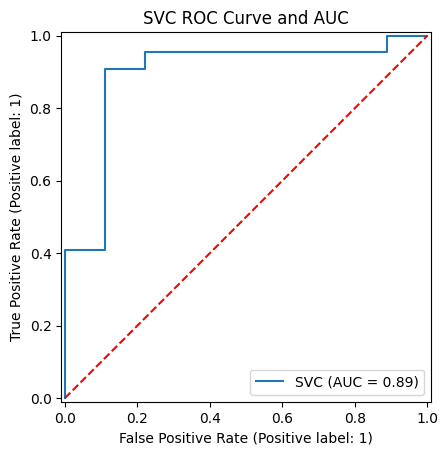

In [125]:
RocCurveDisplay.from_estimator(svc_model, x_test, y_test)
plt.title("SVC ROC Curve and AUC")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### 6.4 Random Forest Algorithm <a id = 59></a>

[Go to Project Content](#x)

In [107]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=5)
random_forest.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
y_pred = random_forest.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [109]:
print("The test acuuracy score of Random Forest Classifier is: ",accuracy_score(y_test,y_pred))

The test acuuracy score of Random Forest Classifier is:  0.8387096774193549


In [110]:
scores = cross_val_score(random_forest,x_test,y_test,cv = 10)
print("Random Forest Cross Validation Accuracy Scores",scores.mean())

Random Forest Cross Validation Accuracy Scores 0.8999999999999998


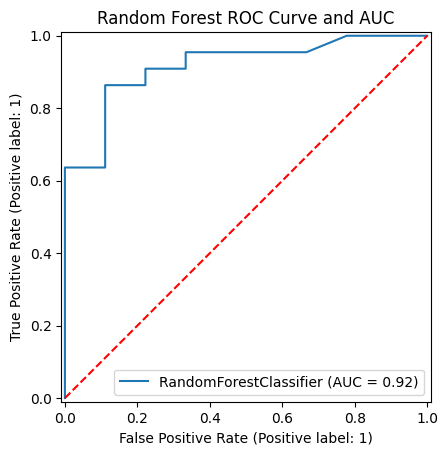

In [126]:
RocCurveDisplay.from_estimator(random_forest, x_test, y_test)
plt.title("Random Forest ROC Curve and AUC")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### 6.4.1 HyperParameter Optimization (with GridsearchCV)<a id = 60></a>

[Go to Project Content](#x)

In [112]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}
random_forest_grid = GridSearchCV(random_forest_new,param_grid = parameters)

In [114]:
random_forest_grid.fit(x_train,y_train)

,estimator,RandomForestC...andom_state=5)
,param_grid,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [115]:
print("Best Parameters:",random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [116]:
random_forest_new2 = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_features= 'sqrt', n_estimators=200,random_state=5)

In [117]:
random_forest_new2.fit(x_train,y_train)

,n_estimators,200
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [118]:
y_pred = random_forest_new2.predict(x_test)

In [119]:
print("The accuracy score of Random Forest after hyper parameter tuning is:",accuracy_score(y_test,y_pred))

The accuracy score of Random Forest after hyper parameter tuning is: 0.9032258064516129


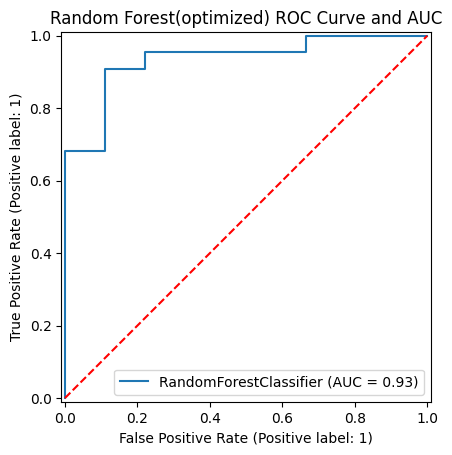

In [127]:
RocCurveDisplay.from_estimator(random_forest_new2, x_test, y_test)
plt.title("Random Forest(optimized) ROC Curve and AUC")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

## 7. PROJECT CONCLUSION<a id = 61></a>

**The activities we carried out within the scope of the project are as follows:**

1. Within the scope of the project, we first made the data set ready for **Exploratory Data Analysis(EDA)**
2. We performed **Exploratory Data Analysis(EDA)**.
3. We analyzed numerical and categorical variables within the scope of univariate analysis by using **Distplot** and **Pie Chart** graphics.
4. Within the scope of bivariate analysis, we analyzed the variables among each other using **FacetGrid, Count Plot, Pair Plot, Swarm plot, Box plot, and Heatmap** graphics.
5. We made the data set ready for the model. In this context, we struggled with **missing** and **outlier** values.
6. We used **four different algorithms** in the model phase.
7. We got **87% accuracy** and **88% AUC** with the **Logistic Regression model**.
8. We got **83% accuracy** and **85% AUC** with the **Decision Tree Model**.
9. We got **83% accuracy** and **89% AUC** with the **Support Vector Classifier Model**.
10. And we got **90.3% accuracy** and **93% AUC** with the **Random Forest Classifier Model**.
11. When all these model outputs are evaluated, we **prefer** the model we created with the **Random Forest Algorithm**, which gives the **best results**.

[Go to Project Content](#x)

In [121]:
import pickle

with open("../models/random_forest_new2.pkl", "wb") as f:
    pickle.dump(log_reg, f)

print("Model saved successfully in 'models/modelrandom_forest_new2.pkl'")

Model saved successfully in 'models/modelrandom_forest_new2.pkl'
